## EDA

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn import metrics
import matplotlib.pyplot as plt
#from cf_matrix import make_confusion_matrix
%matplotlib inline

In [36]:
HIDDEN_LAYER_SIZES = 12
MAX_ITER = 500
LABELS = ['True Neg','False Pos','False Neg','True Pos']
CATEGORIES = ['Married', 'Divorced']
TEST_SIZE = 0.8
SVM_TITLE = 'SVM 20-80 Confusion Matrix'
RF_TITLE = 'Random Forest 20-80 Confusion Matrix'
NN_TITLE = 'Neural Network 20-80 Confusion Matrix'

In [37]:
divorce = pd.read_csv('/content/sample_data/divorce-csv.csv')
display(divorce.sample(5))
display(divorce.describe())

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
86,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,0
136,0,0,2,0,0,0,0,0,0,0,...,3,1,2,1,2,1,2,2,0,0
145,0,0,0,0,0,0,0,0,0,0,...,3,4,3,1,3,3,0,1,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0
74,3,2,3,2,3,2,1,2,3,2,...,4,3,4,3,3,4,3,4,3,1


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [38]:
divorce.shape

(170, 55)

0    86
1    84
Name: Class, dtype: int64


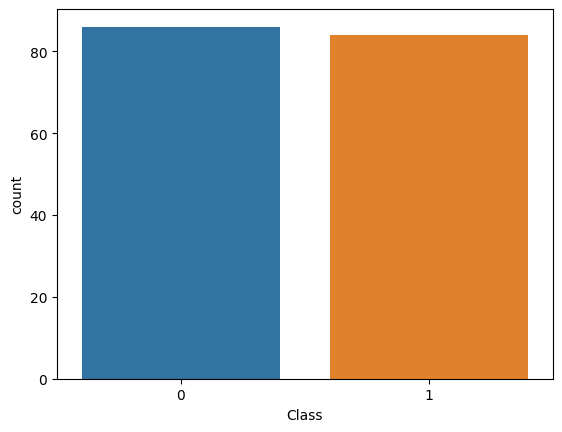

In [39]:
print(divorce['Class'].value_counts())

# Plot the count of each class
sns.countplot(x='Class', data=divorce)
plt.show()

In [40]:
divorce.dtypes.tail()

Atr51    int64
Atr52    int64
Atr53    int64
Atr54    int64
Class    int64
dtype: object

In [41]:
divorce.Atr1.value_counts()

0    69
3    47
4    31
2    14
1     9
Name: Atr1, dtype: int64

In [42]:
divorce['Class'].describe()

count    170.000000
mean       0.494118
std        0.501442
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [43]:
divorce.Atr1.unique()

array([2, 4, 3, 0, 1])

<Axes: >

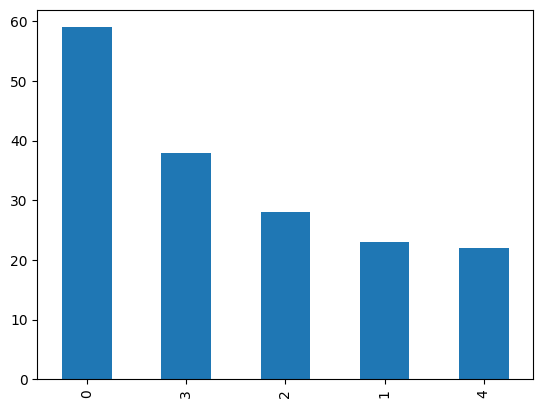

In [44]:
divorce.Atr2.value_counts().plot(kind='bar')

## Preprocessing

In [45]:
total = divorce.isnull().sum().sort_values(ascending=False)
total.head(10)

Atr1     0
Atr42    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
dtype: int64

In [46]:
X = divorce.drop('Class', axis=1)
y = divorce['Class']

In [47]:
display(X)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


In [48]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Class, Length: 170, dtype: int64

In [49]:
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Eğitim seti boyutu
print(X_train.shape)

# Test seti boyutu
print(X_test.shape)

(136, 54)
(34, 54)


In [50]:
#To normalise the values of the dataset to improve the model accuracy.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
display(X_train)

array([[ 1.44503015,  1.73741668,  1.63958014, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-1.05051398, -1.09238774, -0.48406652, ...,  0.34160509,
         0.53436582, -0.56225353],
       [ 0.19725808,  0.32251447,  0.2238157 , ..., -0.33170349,
        -0.14482812,  0.0446233 ],
       ...,
       [ 0.82114411,  1.73741668,  0.93169792, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-0.42662795, -0.38493663, -1.19194873, ..., -1.00501207,
        -0.82402205, -0.56225353],
       [-1.05051398, -1.09238774, -1.19194873, ...,  1.01491367,
        -0.82402205,  0.0446233 ]])

In [52]:
display(y_test)

139    0
30     1
119    0
29     1
144    0
163    0
166    0
51     1
105    0
60     1
15     1
158    0
135    0
45     1
68     1
85     0
24     1
109    0
75     1
108    0
19     1
16     1
31     1
18     1
12     1
9      1
82     1
98     0
76     1
55     1
42     1
56     1
150    0
111    0
Name: Class, dtype: int64

In [53]:
display(X_test)

array([[ 0.82114411, -0.38493663, -0.48406652, ..., -1.67832065,
        -1.50321599,  1.25837695],
       [ 0.82114411,  1.73741668,  0.93169792, ...,  1.01491367,
         1.21355975,  1.25837695],
       [-1.05051398, -0.38493663, -0.48406652, ..., -1.00501207,
        -0.82402205, -1.16913036],
       ...,
       [ 0.82114411,  1.73741668,  0.93169792, ...,  0.34160509,
         0.53436582,  0.65150012],
       [-1.05051398,  1.02996558,  0.2238157 , ..., -0.33170349,
        -1.50321599, -0.56225353],
       [-0.42662795, -0.38493663, -0.48406652, ..., -1.00501207,
        -0.82402205, -1.16913036]])

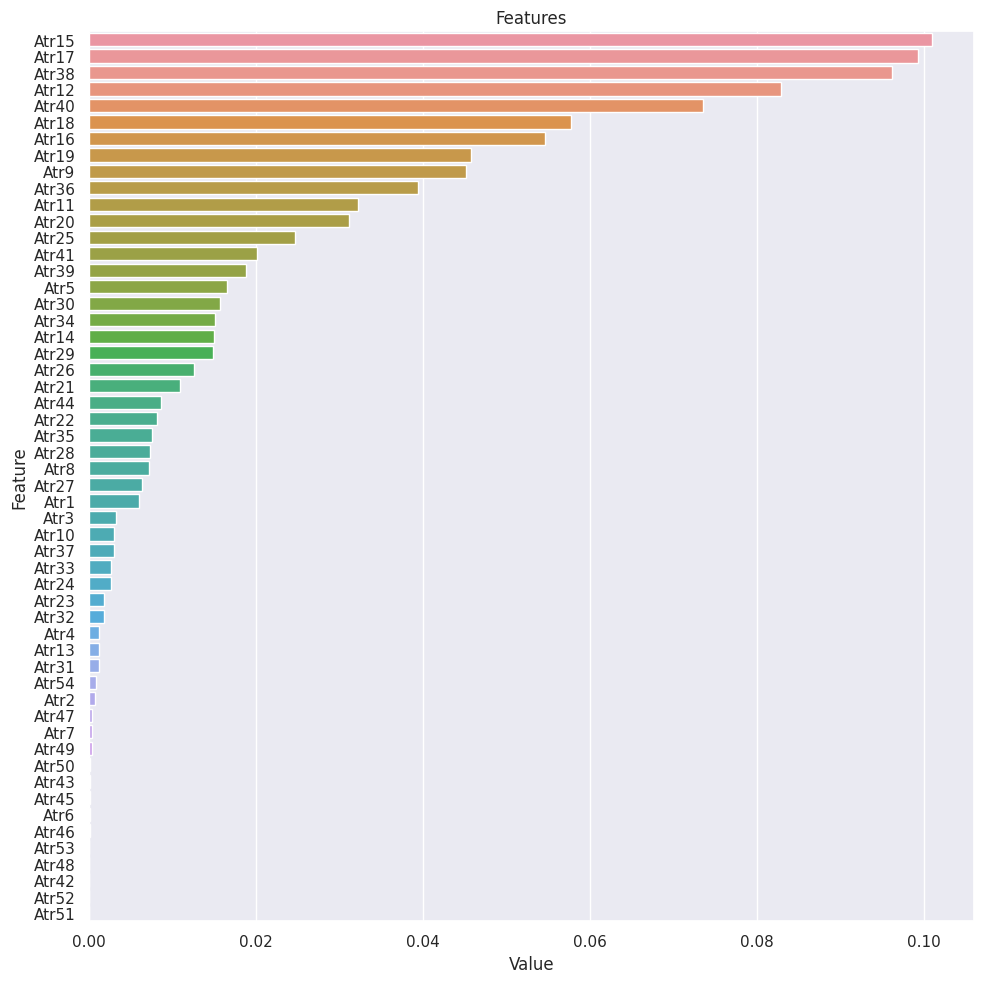

In [62]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

# Veriyi hazırla
# Burada X ve y'yi nasıl tanımladığınıza bağlı olarak uygun bir şekilde hazırlamalısınız.
# Örneğin, X_train, y_train gibi eğitim verilerini kullanabilirsiniz.

# RandomForestClassifier modeli oluştur
rfc = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=42)

# Modeli eğit
rfc.fit(X_train, y_train)

# plot_importance fonksiyonunu kullanarak özellik önem sıralaması çiz
plot_importance(rfc, X_train)

## %80 - %20

Random Forest Accuracy: 0.9705882352941176
K-Nearest Neighbors Accuracy: 0.9705882352941176
SVM Accuracy: 0.9705882352941176
Perceptron Accuracy: 0.9705882352941176
Logistic Regression Accuracy: 1.0
Naive Bayes Accuracy: 0.9411764705882353


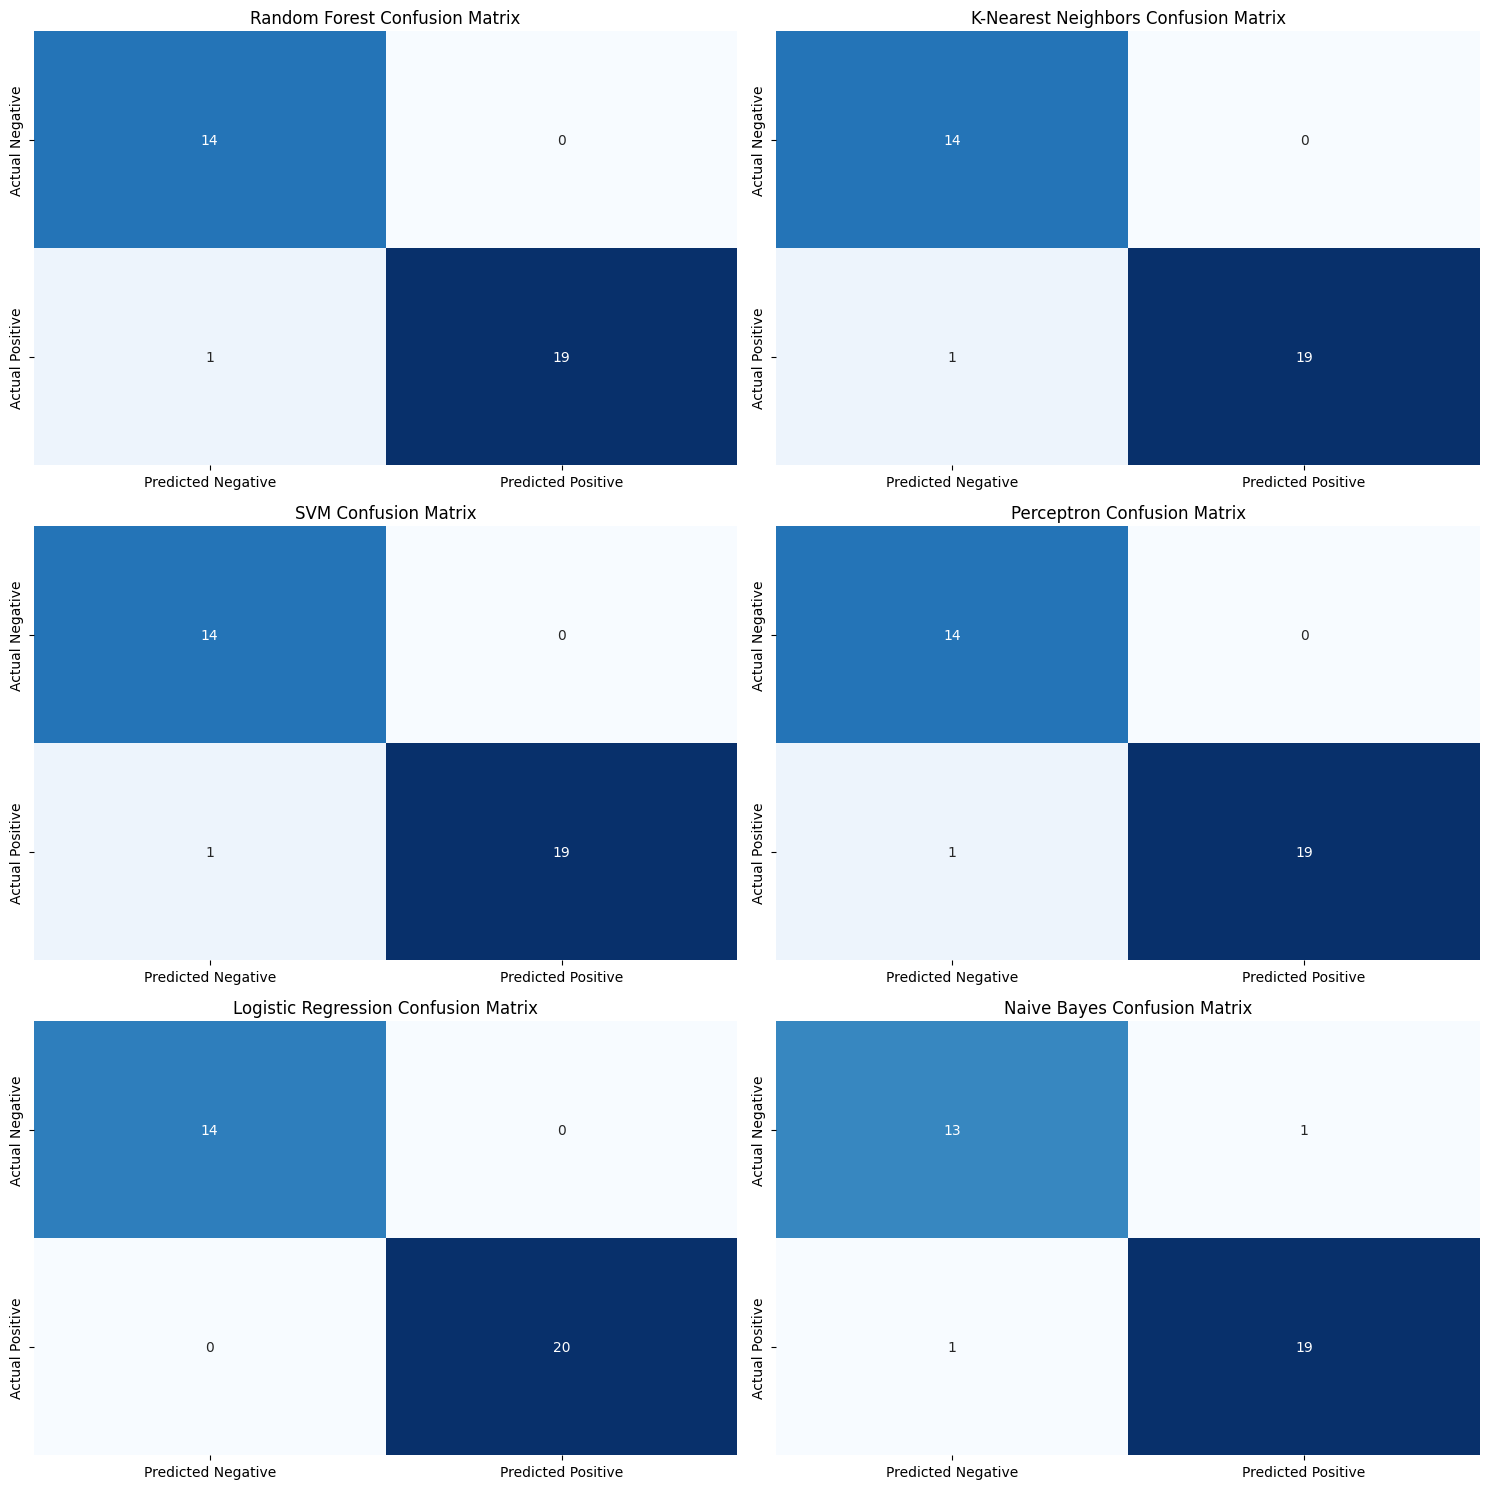

Machine Learning Models      ACCURACY
-------------------------  ----------
Random Forest                0.970588
K-Nearest Neighbors          0.970588
SVM                          0.970588
Perceptron                   0.970588
Logistic Regression          1
Naive Bayes                  0.941176


In [58]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Verileriniz ve etiketleriniz X_train, y_train, X_test, y_test olarak varsayılmıştır.
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors, komşu sayısını belirtir, isteğe bağlı olarak değiştirilebilir
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Sonuçları ekrana yazdırıyoruz
print("Random Forest Accuracy:", accuracy_rf)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print("Perceptron Accuracy:", accuracy_perceptron)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Naive Bayes Accuracy:", accuracy_nb)


# Karışıklık matrislerini görselleştiriyoruz
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Random Forest
sns.heatmap(ax=axes[0, 0], data=cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 0].set_title("Random Forest Confusion Matrix")

# K-Nearest Neighbors
sns.heatmap(ax=axes[0, 1], data=cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 1].set_title("K-Nearest Neighbors Confusion Matrix")

# SVM
sns.heatmap(ax=axes[1, 0], data=cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 0].set_title("SVM Confusion Matrix")

# Perceptron
sns.heatmap(ax=axes[1, 1], data=cm_perceptron, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 1].set_title("Perceptron Confusion Matrix")

# Logistic Regression
sns.heatmap(ax=axes[2, 0], data=cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 0].set_title("Logistic Regression Confusion Matrix")

# Naive Bayes
sns.heatmap(ax=axes[2, 1], data=cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 1].set_title("Naive Bayes Confusion Matrix")

results = [
["Models", "ACCURACY"],
["Random Forest", accuracy_rf],
["K-Nearest Neighbors", accuracy_knn],
["SVM", accuracy_svm],
["Perceptron", accuracy_perceptron],
["Logistic Regression", accuracy_lr],
["Naive Bayes", accuracy_nb]
]

table = tabulate(results, headers="firstrow")

plt.tight_layout()
plt.show()

print(table)

## %30 - %70

Random Forest Accuracy: 0.9803921568627451
K-Nearest Neighbors Accuracy: 0.9803921568627451
SVM Accuracy: 0.9803921568627451
Perceptron Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Naive Bayes Accuracy: 0.9803921568627451


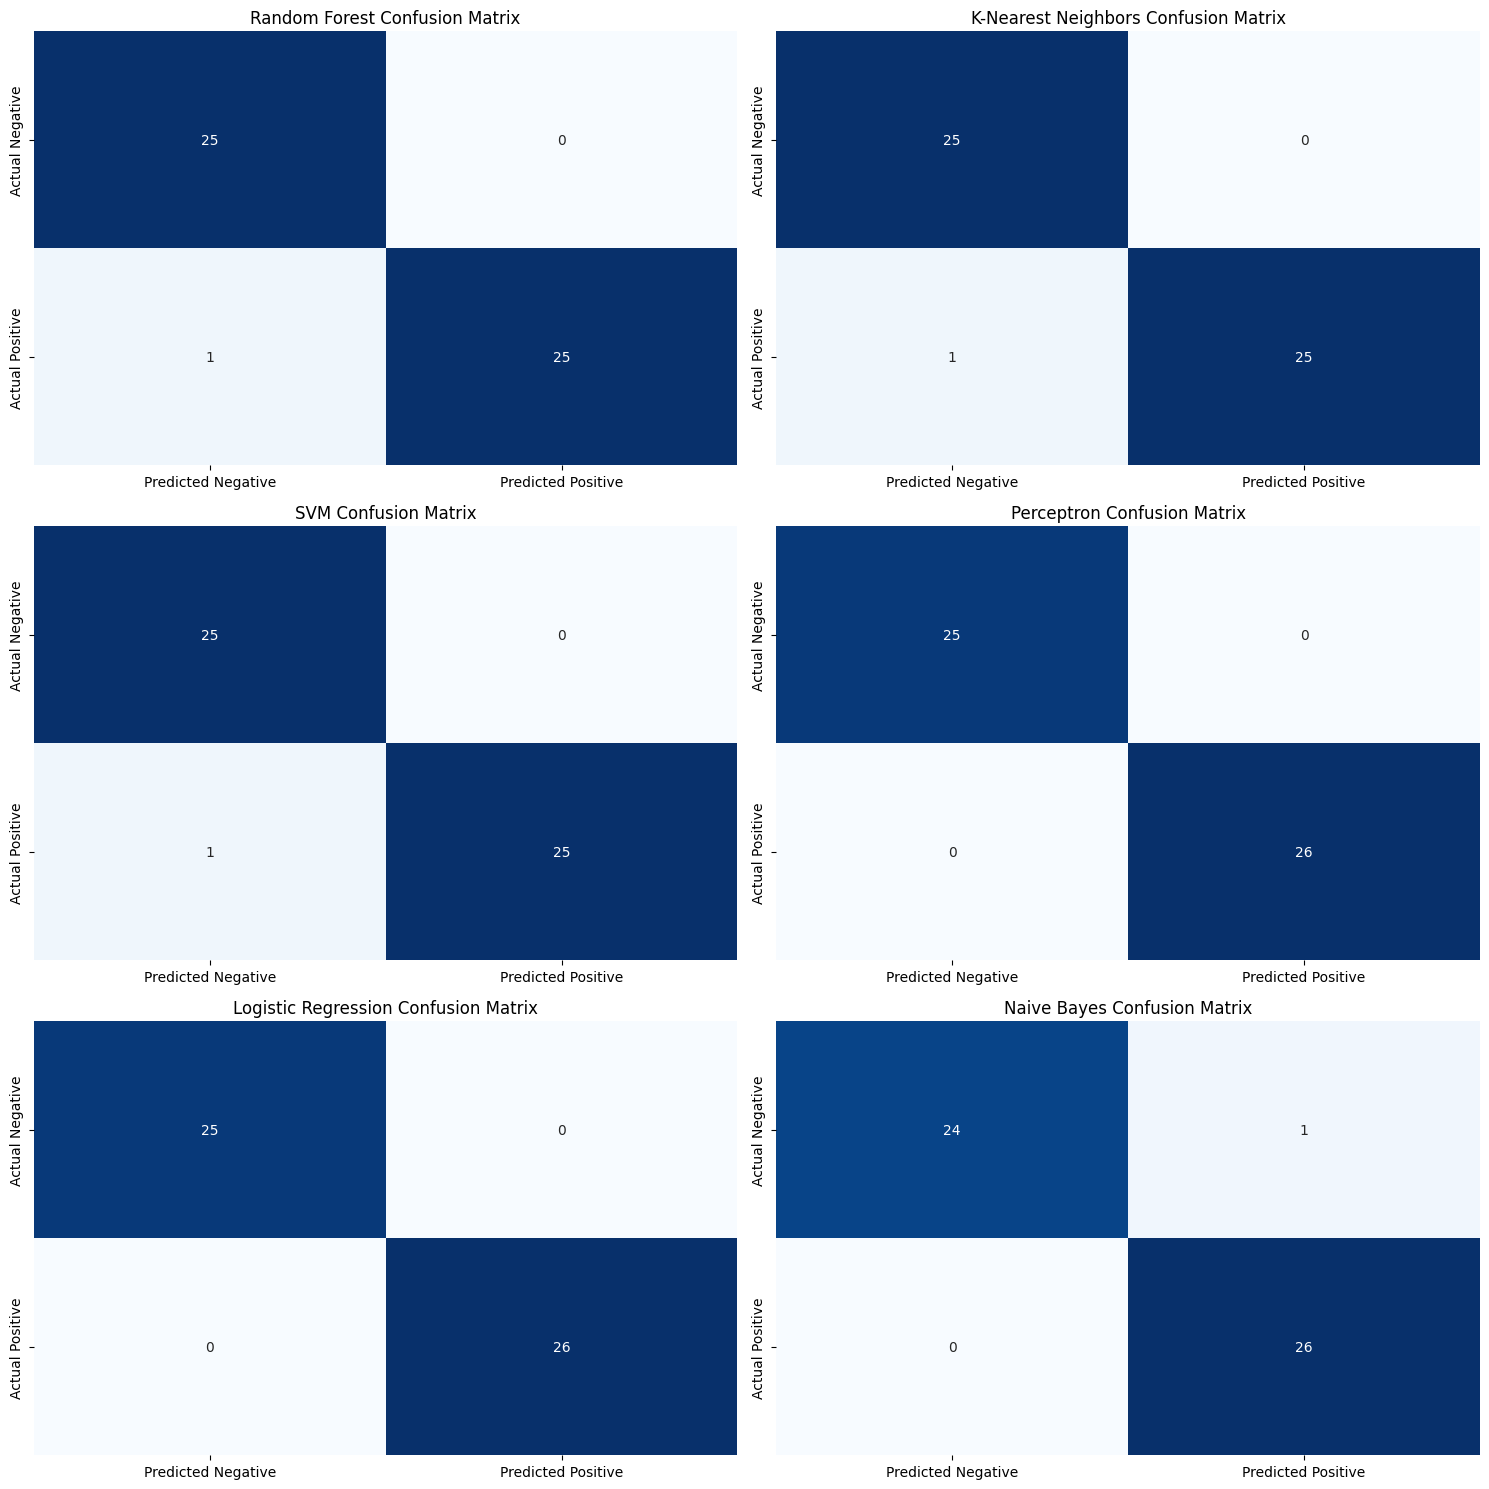

Models                 ACCURACY
-------------------  ----------
Random Forest          0.980392
K-Nearest Neighbors    0.980392
SVM                    0.980392
Perceptron             1
Logistic Regression    1
Naive Bayes            0.980392


In [59]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Verileriniz ve etiketleriniz X_train, y_train, X_test, y_test olarak varsayılmıştır.
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors, komşu sayısını belirtir, isteğe bağlı olarak değiştirilebilir
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Sonuçları ekrana yazdırıyoruz
print("Random Forest Accuracy:", accuracy_rf)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print("Perceptron Accuracy:", accuracy_perceptron)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Naive Bayes Accuracy:", accuracy_nb)


# Karışıklık matrislerini görselleştiriyoruz
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Random Forest
sns.heatmap(ax=axes[0, 0], data=cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 0].set_title("Random Forest Confusion Matrix")

# K-Nearest Neighbors
sns.heatmap(ax=axes[0, 1], data=cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 1].set_title("K-Nearest Neighbors Confusion Matrix")

# SVM
sns.heatmap(ax=axes[1, 0], data=cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 0].set_title("SVM Confusion Matrix")

# Perceptron
sns.heatmap(ax=axes[1, 1], data=cm_perceptron, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 1].set_title("Perceptron Confusion Matrix")

# Logistic Regression
sns.heatmap(ax=axes[2, 0], data=cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 0].set_title("Logistic Regression Confusion Matrix")

# Naive Bayes
sns.heatmap(ax=axes[2, 1], data=cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 1].set_title("Naive Bayes Confusion Matrix")

results = [
["Models", "ACCURACY"],
["Random Forest", accuracy_rf],
["K-Nearest Neighbors", accuracy_knn],
["SVM", accuracy_svm],
["Perceptron", accuracy_perceptron],
["Logistic Regression", accuracy_lr],
["Naive Bayes", accuracy_nb]
]

table = tabulate(results, headers="firstrow")

plt.tight_layout()
plt.show()

print(table)

## %60 - %40

Random Forest Accuracy: 0.9705882352941176
K-Nearest Neighbors Accuracy: 0.9705882352941176
SVM Accuracy: 0.9705882352941176
Perceptron Accuracy: 0.9558823529411765
Logistic Regression Accuracy: 0.9705882352941176
Naive Bayes Accuracy: 0.9705882352941176


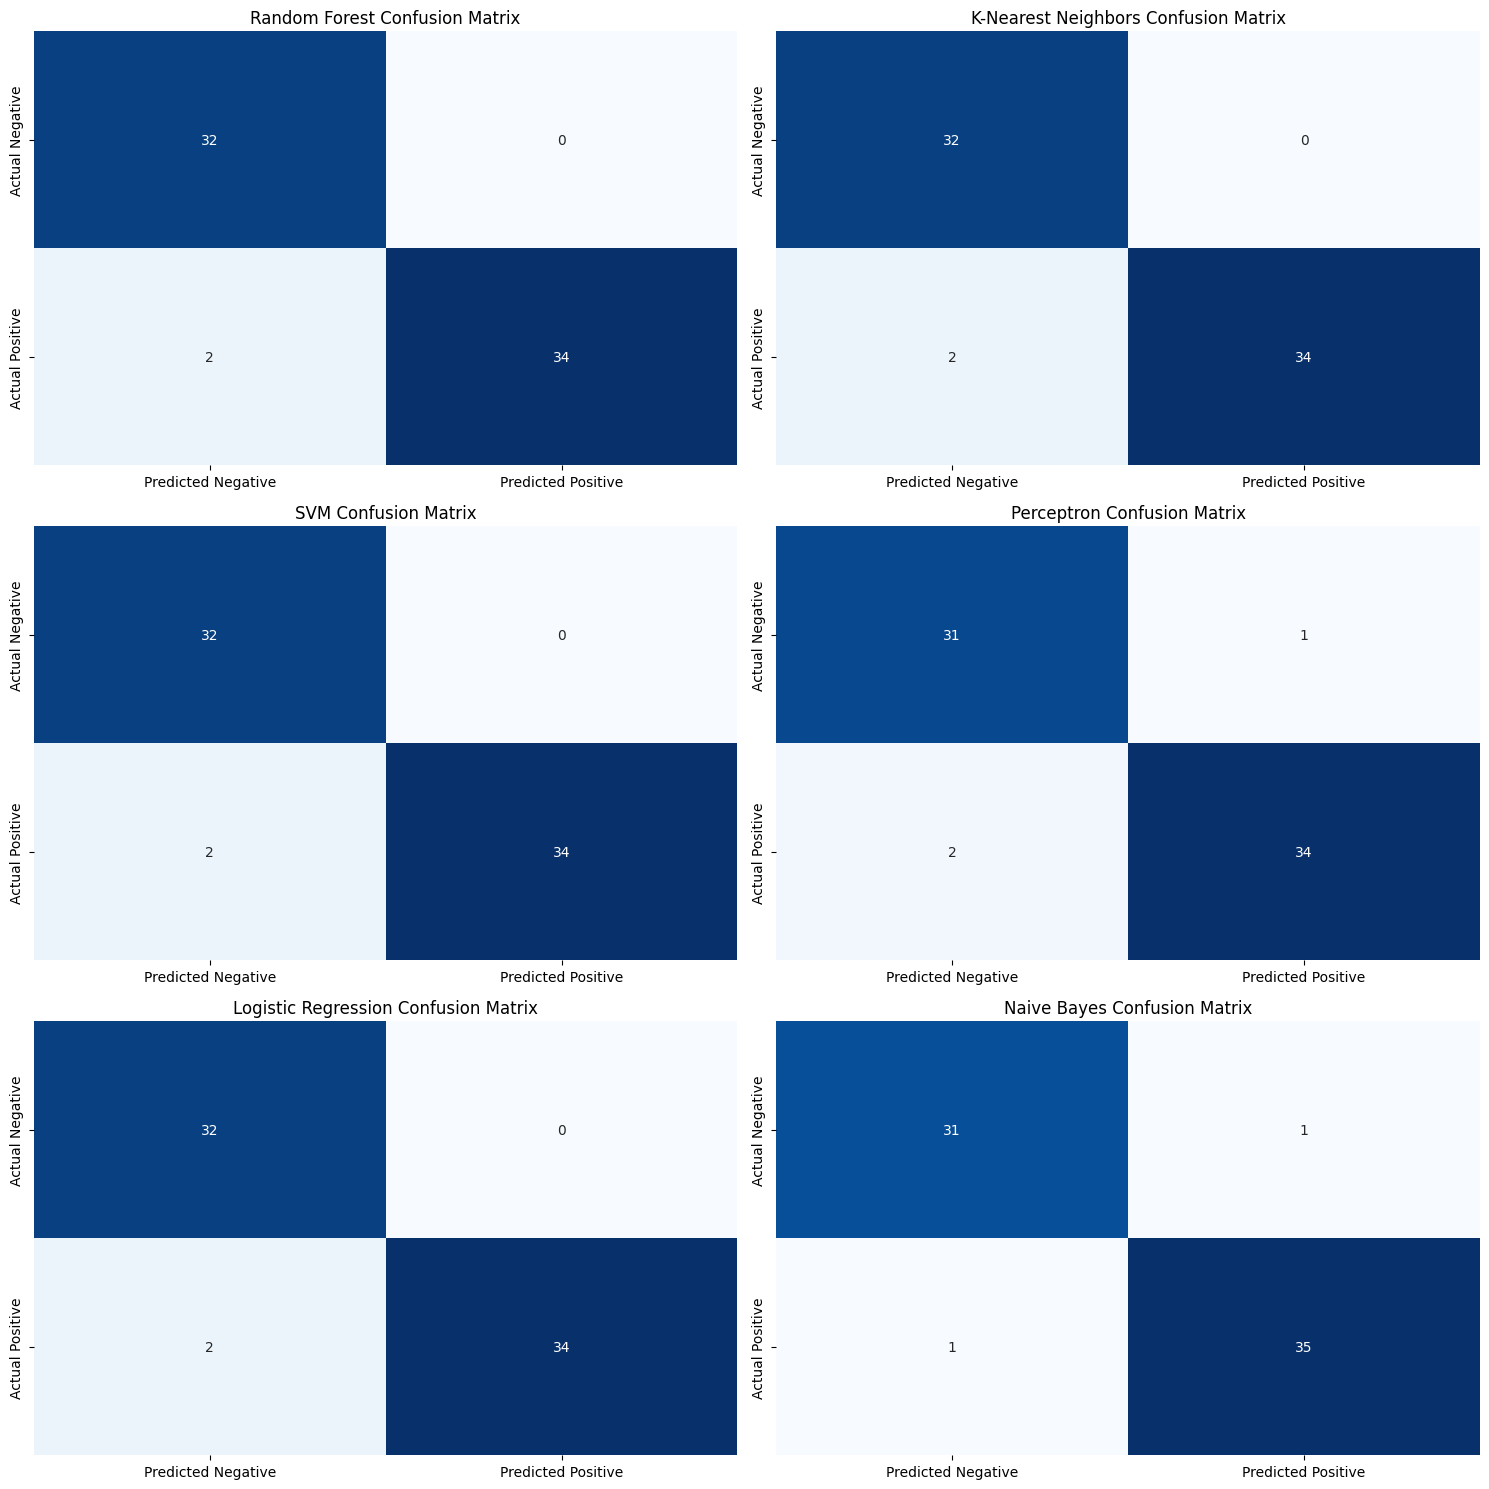

Models                 ACCURACY
-------------------  ----------
Random Forest          0.970588
K-Nearest Neighbors    0.970588
SVM                    0.970588
Perceptron             0.955882
Logistic Regression    0.970588
Naive Bayes            0.970588


In [61]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Verileriniz ve etiketleriniz X_train, y_train, X_test, y_test olarak varsayılmıştır.
# Örnek: Test seti oranı %20, eğitim seti oranı %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors, komşu sayısını belirtir, isteğe bağlı olarak değiştirilebilir
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Sonuçları ekrana yazdırıyoruz
print("Random Forest Accuracy:", accuracy_rf)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print("Perceptron Accuracy:", accuracy_perceptron)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Naive Bayes Accuracy:", accuracy_nb)


# Karışıklık matrislerini görselleştiriyoruz
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Random Forest
sns.heatmap(ax=axes[0, 0], data=cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 0].set_title("Random Forest Confusion Matrix")

# K-Nearest Neighbors
sns.heatmap(ax=axes[0, 1], data=cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[0, 1].set_title("K-Nearest Neighbors Confusion Matrix")

# SVM
sns.heatmap(ax=axes[1, 0], data=cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 0].set_title("SVM Confusion Matrix")

# Perceptron
sns.heatmap(ax=axes[1, 1], data=cm_perceptron, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[1, 1].set_title("Perceptron Confusion Matrix")

# Logistic Regression
sns.heatmap(ax=axes[2, 0], data=cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 0].set_title("Logistic Regression Confusion Matrix")

# Naive Bayes
sns.heatmap(ax=axes[2, 1], data=cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
axes[2, 1].set_title("Naive Bayes Confusion Matrix")

results = [
["Models", "ACCURACY"],
["Random Forest", accuracy_rf],
["K-Nearest Neighbors", accuracy_knn],
["SVM", accuracy_svm],
["Perceptron", accuracy_perceptron],
["Logistic Regression", accuracy_lr],
["Naive Bayes", accuracy_nb]
]

table = tabulate(results, headers="firstrow")

plt.tight_layout()
plt.show()

print(table)